# Classification

In this excercise you are going to work on the Yelp database (that can be found here). The goal is to  predict if a comment  about a venue is bad or good. The database contains information such as venue ID, date of comment, rating and of course comments of the users. In order to use the information contained in the comments, you are gonna have to apply some preprocessing to the data.

A "bad" venue is defined as a venue with a star rating of less or equal to two stars, the other venues being considered as "good". Note that this is for the sake of working with a classification problem. One could actually work with the number of stars and use regression algorithms (which could actually be a better idea).

### Cleaning the data

If you give as input variable the raw comments of the dataset, you model will be of extremely poor accuracy. Some transformations should be made on the comments to extract the necessary information and put it in a form appropriate for a machine learning model. 

You should first clean the raw text. The type of cleaning depends on which data you have and what you want to achieve : remove punctation, switch everything to lower case, remove words containing numbers, remove words not adding any information (like "the" or "of", usually called "stopwords"), taking only the root of the words (and therefore consider words with same root but different ending as similar),...  For example, you may want "*I was disappointed, what a terrible quality of food!!!*" to be tranformed into "*disappointed terrible quality food*".
You can have a look at the most frequent words in every classes to have an idea of the quality of your cleaning.

## Me: Rajat, Email: rjtkpanda@gmail.com 

## Loaded the Modules required

In [1]:
#This module list is keep getting bigger as we move forward in the process of writing the code

%matplotlib inline
import matplotlib                                  #for plotting 
import matplotlib.pylab as plt                     #for plotting 
matplotlib.rcParams['savefig.dpi'] = 144
matplotlib.rcParams['figure.figsize'] = (10,7)
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['lines.markersize'] = 15

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import pipeline
import itertools
import seaborn as sns
import re
from pprint import pprint

## Data collection and Data exploration:

### Data Collection

In [3]:
#  f = /home/rajat/git/P2.11/Data/yelp_train_academic_dataset_review.json
#Convert a JSON string to pandas object
data = pd.read_json('/home/rajat/git/P2.11/Data/yelp_train_academic_dataset_review.json',lines=True)

In [4]:
pprint(data)

                    business_id       date               review_id  stars  \
0        vcNAWiLM4dR7D2nwwJ7nCA 2007-05-17  15SdjuK7DmYqUAj6rjGowg      5   
1        vcNAWiLM4dR7D2nwwJ7nCA 2010-03-22  RF6UnRTtG7tWMcrO2GEoAg      2   
2        vcNAWiLM4dR7D2nwwJ7nCA 2012-02-14  -TsVN230RCkLYKBeLsuz7A      4   
3        vcNAWiLM4dR7D2nwwJ7nCA 2012-03-02  dNocEAyUucjT371NNND41Q      4   
4        vcNAWiLM4dR7D2nwwJ7nCA 2012-05-15  ebcN2aqmNUuYNoyvQErgnA      4   
5        vcNAWiLM4dR7D2nwwJ7nCA 2013-04-19  _ePLBPrkrf4bhyiKWEn4Qg      1   
6        vcNAWiLM4dR7D2nwwJ7nCA 2014-01-02  kMu0knsSUFW2DZXqKkGWlg      5   
7        vcNAWiLM4dR7D2nwwJ7nCA 2014-01-08  onDPFgNZpMk-bT1zlForRA      5   
8        JwUE5GmEO-sH1FuwJgKBlQ 2009-05-03  9uHZyOu5CTCDl1L6cfvOCA      4   
9        JwUE5GmEO-sH1FuwJgKBlQ 2009-05-04  ow1c4Lcl3ObWxDC2yurwjQ      4   
10       JwUE5GmEO-sH1FuwJgKBlQ 2010-10-30  FRTCszJWkJonDAZx3yr8FA      4   
11       JwUE5GmEO-sH1FuwJgKBlQ 2011-02-06  qQIvtbqUujvvnJDzPSfmFA      4   

In [5]:
# properties of original data
print('Type:',type(data))
print(data.shape)

('Type:', <class 'pandas.core.frame.DataFrame'>)
(1012913, 8)


In [6]:
print('Features:', data.keys())  # print all the features available

('Features:', Index([u'business_id', u'date', u'review_id', u'stars', u'text', u'type',
       u'user_id', u'votes'],
      dtype='object'))


## Data preparation:

In [7]:
# dropping the unnecessary features from pandas

feature_to_drop=set(data.columns.values)-set(['stars','text'])
data.drop(columns=list(feature_to_drop),inplace=True)
pprint(data.shape)
print('Features:', data.keys())

(1012913, 2)
('Features:', Index([u'stars', u'text'], dtype='object'))


In [8]:
#renaming the features stars as goodness and text as 
data.rename(columns={'stars':'goodness'}, inplace=True)
print('Features:', data.keys())

('Features:', Index([u'goodness', u'text'], dtype='object'))


In [9]:
pprint(data)

         goodness                                               text
0               5  dr. goldberg offers everything i look for in a...
1               2  Unfortunately, the frustration of being Dr. Go...
2               4  Dr. Goldberg has been my doctor for years and ...
3               4  Been going to Dr. Goldberg for over 10 years. ...
4               4  Got a letter in the mail last week that said D...
5               1  I don't know what Dr. Goldberg was like before...
6               5  Top notch doctor in a top notch practice. Can'...
7               5  Dr. Eric Goldberg is a fantastic doctor who ha...
8               4  Good truck stop dining at the right price. We ...
9               4  If you like lot lizards, you'll love the Pine ...
10              4  Enjoyable experience for the whole family. The...
11              4  One of my favorite truck stop diners with soli...
12              4  Only went here once about a year and a half ag...
13              4  Great truck sto

In [10]:
def convert(stars):
    if stars>2:
        return True
    else:
        return False  

# For the function to go through each element and make changes according to the value, We will use lamda function
data['goodness']=data['goodness'].apply(lambda x: convert(x))    

In [11]:
pprint(data)

         goodness                                               text
0            True  dr. goldberg offers everything i look for in a...
1           False  Unfortunately, the frustration of being Dr. Go...
2            True  Dr. Goldberg has been my doctor for years and ...
3            True  Been going to Dr. Goldberg for over 10 years. ...
4            True  Got a letter in the mail last week that said D...
5           False  I don't know what Dr. Goldberg was like before...
6            True  Top notch doctor in a top notch practice. Can'...
7            True  Dr. Eric Goldberg is a fantastic doctor who ha...
8            True  Good truck stop dining at the right price. We ...
9            True  If you like lot lizards, you'll love the Pine ...
10           True  Enjoyable experience for the whole family. The...
11           True  One of my favorite truck stop diners with soli...
12           True  Only went here once about a year and a half ag...
13           True  Great truck sto

In [12]:
#the text is with both lower and upper case letter we have to convert all the letters to lower case letter 
print(data['text'].iloc[3])

Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life.


In [13]:
# to replace upper case letter with lower case letter using regula expression module
# print(data_tmp['text'].iloc[0],'\n')
data['text']=data['text'].apply(lambda x: x.lower())

In [14]:
#we can see the upper case letters has been turned to lower case letter
print(data['text'].iloc[3])

been going to dr. goldberg for over 10 years. i think i was one of his 1st patients when he started at mhmg. he's been great over the years and is really all about the big picture. it is because of him, not my now former gyn dr. markoff, that i found out i have fibroids. he explores all options with you and is very patient and understanding. he doesn't judge and asks all the right questions. very thorough and wants to be kept in the loop on every aspect of your medical health and your life.


### Removing Punchuations

In [15]:
punctuation = ['(', ')', '?', ':', ':', ',', '.', '!', '/', '"', "'"]
for i in punctuation:
    data['text'] = data['text'].str.replace(i, '')
    

In [16]:
print(data['text'].iloc[3])

been going to dr goldberg for over 10 years i think i was one of his 1st patients when he started at mhmg hes been great over the years and is really all about the big picture it is because of him not my now former gyn dr markoff that i found out i have fibroids he explores all options with you and is very patient and understanding he doesnt judge and asks all the right questions very thorough and wants to be kept in the loop on every aspect of your medical health and your life


### The ratio of the tags. It is told 80% as per the manual.

In [17]:
good = np.count_nonzero(data['goodness'])
bad = len(data) - good
print('good:', good)
print('Bad;', bad)
print('relative ratio', good/bad)

('good:', 820907)
('Bad;', 192006)
('relative ratio', 4)


We can notice that the data set is not balanced , there are two ways to take care of it. First is to create a data set which is balanced then work with or during the analysis incorporate this uunbalanced factor. Here I will be taking the unbalanced factor into account while doing my analysis.

### I will be working a smaller subset to make it faster.

In [18]:
from sklearn.model_selection import train_test_split

text =  data['text']
goodness = data['goodness']

xsubset, x_unused, ysubset, y_unused = train_test_split(text, goodness, test_size=0.8, random_state=42)

# I am taking fraction of a fraction for the real training and testing
x_train, x_test, y_train, y_test = train_test_split(xsubset, ysubset, test_size=0.2, random_state=42)


print("Subset in use", len(xsubset),len(ysubset))
print("Unused subset", len(x_unused),len(y_unused))
print("Training size:", len(x_train),len(y_train))
print("Test size:", len(x_test),len(y_test))

('Subset in use', 202582, 202582)
('Unused subset', 810331, 810331)
('Training size:', 162065, 162065)
('Test size:', 40517, 40517)


### Vectorization

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# for data exploration 
cv = CountVectorizer()
train_cv = cv.fit_transform(x_train)

print train_cv.shape
print len(cv.vocabulary_)

total_word_count = train_cv.sum(axis = 0)
print total_word_count.shape


(162065, 156710)
156710
(1, 156710)


In [20]:
print train_cv.shape
print len(cv.vocabulary_)

total_word_count = train_cv.sum(axis = 0)
print total_word_count.shape

print "Most frequent words:"
for idx in xrange(1,51):
    vocabulary_index = total_word_count.argsort(axis=1)[0,-1*idx]
    word = cv.get_feature_names()[vocabulary_index]
    print "{0:10} {1:10} {2:10}".format(idx,word,total_word_count[0,vocabulary_index])


(162065, 156710)
156710
(1, 156710)
Most frequent words:
         1 the           1079320
         2 and            691012
         3 to             497984
         4 was            353611
         5 of             324274
         6 it             274193
         7 is             257811
         8 in             244860
         9 for            244844
        10 that           185452
        11 my             182472
        12 with           168912
        13 but            167098
        14 this           166539
        15 we             163760
        16 you            163555
        17 they           151156
        18 on             148350
        19 have           132477
        20 not            122814
        21 had            119285
        22 so             112162
        23 at             110940
        24 were           109087
        25 are            104406
        26 good            99411
        27 place           95586
        28 food            89983
        29 as      

### Removing the stop words from the list

In [21]:
#adding more stop words manually
from sklearn.feature_extraction import text 

my_stop_words = ['time','great','ive','really','im','dont','didnt','came,''food','going','just','got','did']
stop_words = text.ENGLISH_STOP_WORDS.union(my_stop_words)

In [22]:
cv = CountVectorizer(stop_words=set(stop_words))
train_cv = cv.fit_transform(x_train)

print (train_cv.shape)
print (len(cv.vocabulary_))

total_word_count = train_cv.sum(axis = 0)
print (total_word_count.shape)

print ("Most frequent words:")
for idx in range(1,21):
    vocabulary_index = total_word_count.argsort(axis=1)[0,-1*idx]
    word = cv.get_feature_names()[vocabulary_index]
    print ("{0:10} {1:10} {2:10}".format(idx,word,total_word_count[0,vocabulary_index]))

(162065, 156390)
156390
(1, 156390)
Most frequent words:
         1 good            99411
         2 place           95586
         3 food            89983
         4 like            75635
         5 service         55778
         6 nice            35974
         7 best            31796
         8 love            31395
         9 little          30373
        10 vegas           29569
        11 ordered         27761
        12 people          27403
        13 pretty          27163
        14 try             26654
        15 went            26463
        16 restaurant      26267
        17 order           25660
        18 came            25591
        19 chicken         23764
        20 menu            23591


### Adding more parameters max_df, min_df to remove more words from the file which appear very few places ot too many place or too few places

In [23]:
# max_df When building the vocabulary ignore terms that have a document 
#frequency strictly higher than the given threshold or appears more than some thresold pecentage of the doc.
#I am taking I think any value between 0.8-0.9 would be good measure

#min_df represents the thresold that a word should minimally occure in the doc.

cv = CountVectorizer(stop_words=set(stop_words),lowercase=True, max_df = 0.9,min_df = 10)
train_cv = cv.fit_transform(x_train)

print (train_cv.shape)
print (len(cv.vocabulary_))

total_word_count = train_cv.sum(axis = 0)
print (total_word_count.shape)

print ("Most frequent words:")
for idx in range(1,21):
    vocabulary_index = total_word_count.argsort(axis=1)[0,-1*idx]
    word = cv.get_feature_names()[vocabulary_index]
    print ("{0:10} {1:10} {2:10}".format(idx,word,total_word_count[0,vocabulary_index]))

(162065, 23554)
23554
(1, 23554)
Most frequent words:
         1 good            99411
         2 place           95586
         3 food            89983
         4 like            75635
         5 service         55778
         6 nice            35974
         7 best            31796
         8 love            31395
         9 little          30373
        10 vegas           29569
        11 ordered         27761
        12 people          27403
        13 pretty          27163
        14 try             26654
        15 went            26463
        16 restaurant      26267
        17 order           25660
        18 came            25591
        19 chicken         23764
        20 menu            23591


### To check how the frequency varying among the top ranked words

         1 good            99411
         2 place           95586
         3 food            89983
         4 like            75635
         5 service         55778
         6 nice            35974
         7 best            31796
         8 love            31395
         9 little          30373
        10 vegas           29569
        11 ordered         27761
        12 people          27403
        13 pretty          27163
        14 try             26654
        15 went            26463
        16 restaurant      26267
        17 order           25660
        18 came            25591
        19 chicken         23764
        20 menu            23591


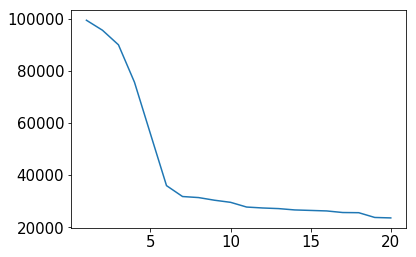

In [24]:
rank=[]
freq=[]
cv_top_20_words_position = {}
for idx in range(1,21):
    vocabulary_index = total_word_count.argsort(axis=1)[0,-1*idx]
    word = cv.get_feature_names()[vocabulary_index]
    print ("{0:10} {1:10} {2:10}".format(idx,word,total_word_count[0,vocabulary_index]))
    rank.append(idx)
    freq.append(total_word_count[0,vocabulary_index])
    cv_top_20_words_position[word]=idx
    
plt.plot(rank, freq)

### TF-IDF transformation
A a logarithmic tf-idf approach is taken to refelct more meaningful behaviour of words which not just appear too many times in the document throughout the course of the document. So to weight the importance we use the TF-IDF transformations.

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()

train_tfidf = tfidf.fit_transform(train_cv)
print train_tfidf.shape

total_word_tfidf = train_tfidf.sum(axis = 0)
print total_word_tfidf.shape


print "Most frequent words:"
for idx in xrange(1,51):
    vocabulary_index = total_word_tfidf.argsort(axis=1)[0,-1*idx]
    word = cv.get_feature_names()[vocabulary_index]
    old_position = '-'
    if word in cv_top_20_words_position:
        old_position=str(cv_top_20_words_position[word])
    print "{0:10} {1:10} {2:10.2f} {3:10}".format(idx,word,float(total_word_tfidf[0,vocabulary_index]),old_position)  

(162065, 23554)
(1, 23554)
Most frequent words:
         1 food          5104.28 3         
         2 good          5042.56 1         
         3 place         4841.58 2         
         4 service       3641.30 5         
         5 like          3377.26 4         
         6 love          2592.43 8         
         7 best          2435.93 7         
         8 nice          2413.10 6         
         9 vegas         2058.48 10        
        10 friendly      2020.18 -         
        11 staff         1978.24 -         
        12 little        1906.06 9         
        13 try           1830.74 14        
        14 pretty        1827.53 13        
        15 chicken       1816.57 19        
        16 pizza         1808.17 -         
        17 restaurant    1794.49 16        
        18 amazing       1762.07 -         
        19 ordered       1735.33 11        
        20 people        1730.38 12        
        21 went          1726.64 15        
        22 better        169

Here we can see a lot of new word popping up which were not in the top frequency chart

## Modeling

## Classification

In [26]:
# Training
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', # the cut at each node is defined by estimator
                            splitter='best', 
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=1, 
                            max_leaf_nodes=None, 
                            class_weight=None, 
                            presort=False)

dt.fit(train_tfidf,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [27]:
score_train = dt.score(train_tfidf,y_train)
print "The accuracy of the model on the training set is:",score_train

The accuracy of the model on the training set is: 0.99979020763274


In [28]:
# test
test_cv = cv.transform(x_test)
test_tfidf = tfidf.transform(test_cv)

score_test = dt.score(test_tfidf,y_test)
print "The accuracy of the model on the training set is:",score_test

The accuracy of the model on the training set is: 0.8256781104227855


##  Optimise the model and Industrialise and Evaluation

## Pipelining

#### It enables us to use the transformations and the analysis step to be merged together into one step 

In [29]:
# I would like to decrese the min-df realizing the imporatant need to not to be scattered and abundent throughout
pipe = pipeline.Pipeline([
                            ('count_vectorizer',CountVectorizer(stop_words=stop_words,min_df=0.01,max_df=0.8)),
                            ('model',DecisionTreeClassifier(criterion='gini',
                            splitter='best',
                            min_samples_split=2,
                            min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=1,
                            max_depth=None,
                            max_leaf_nodes=None, 
                            class_weight=None, 
                            presort=False))
                         ])

In [30]:
count_vec_object = pipe.named_steps['count_vectorizer']
print(count_vec_object)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.8, max_features=None, min_df=0.01,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset(['all', 'show', 'anyway', 'fifty', 'four', 'go', 'mill', 'find', 'seemed', 'whose', 're', 'herself', 'whoever', 'behind', 'should', 'dont', 'to', 'only', 'going', 'under', 'herein', 'do', 'his', 'get', 'very', 'de', 'myself', 'cannot', 'every', 'yourselves', 'him', 'is', 'did', ...st', 'eight', 'but', 'nothing', 'why', 'noone', 'sometimes', 'together', 'time', 'serious', 'once']),
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


## Training and fitting through piplining

In [31]:
pipe = pipe.fit(x_train,y_train)
score_train_pipe = pipe.score(x_train,y_train)
score_test_pipe = pipe.score(x_test,y_test)
print ("new training score is:",score_train_pipe)
print ("new test score is:",score_test_pipe)

('new training score is:', 0.9990744454385586)
('new test score is:', 0.8065750178937237)


## Parameter Optimization

In [40]:
from sklearn.model_selection import GridSearchCV
from pandas import DataFrame

In [46]:
minl_range=np.array([40,50,55,60])
mins_range=[2,3,4]

gs = GridSearchCV(pipe,{"model__min_samples_leaf": minl_range,"model__min_samples_split": mins_range,},
                    cv=2, n_jobs=1, scoring='roc_auc' )

# I am not able to run parallel so njob=1 otherwise it complains
gs.fit(x_train,y_train)

print gs.best_params_
results = DataFrame(data = gs.cv_results_)
results.head(10)

{'model__min_samples_leaf': 55, 'model__min_samples_split': 2}


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_model__min_samples_leaf,param_model__min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,59.927865,14.251641,0.852431,0.888458,40,2,"{u'model__min_samples_leaf': 40, u'model__min_...",10,0.852872,0.890329,0.851990,0.886587,2.445979,0.967029,0.000441,0.001871
1,56.739365,14.348140,0.852431,0.888458,40,3,"{u'model__min_samples_leaf': 40, u'model__min_...",10,0.852872,0.890329,0.851990,0.886587,0.710887,0.248440,0.000441,0.001871
2,56.987890,14.611287,0.852431,0.888458,40,4,"{u'model__min_samples_leaf': 40, u'model__min_...",10,0.852872,0.890329,0.851990,0.886587,1.271989,0.064970,0.000441,0.001871
3,54.110909,13.504802,0.853164,0.883364,50,2,"{u'model__min_samples_leaf': 50, u'model__min_...",4,0.852548,0.885111,0.853779,0.881617,1.928839,0.143793,0.000616,0.001747
4,46.693763,12.685955,0.853164,0.883364,50,3,"{u'model__min_samples_leaf': 50, u'model__min_...",4,0.852548,0.885111,0.853779,0.881617,0.491990,0.167560,0.000616,0.001747
5,47.172947,12.670586,0.853164,0.883364,50,4,"{u'model__min_samples_leaf': 50, u'model__min_...",4,0.852548,0.885111,0.853779,0.881617,0.733002,0.027418,0.000616,0.001747
6,45.012858,12.699642,0.853666,0.881197,55,2,"{u'model__min_samples_leaf': 55, u'model__min_...",1,0.853190,0.882468,0.854142,0.879926,0.093329,0.015243,0.000476,0.001271
7,47.532528,13.094789,0.853666,0.881197,55,3,"{u'model__min_samples_leaf': 55, u'model__min_...",1,0.853190,0.882468,0.854142,0.879926,2.498084,0.445194,0.000476,0.001271
8,48.248718,13.888775,0.853666,0.881197,55,4,"{u'model__min_samples_leaf': 55, u'model__min_...",1,0.853190,0.882468,0.854142,0.879926,0.351267,0.364563,0.000476,0.001271
9,45.884409,13.918672,0.852957,0.879137,60,2,"{u'model__min_samples_leaf': 60, u'model__min_...",7,0.853398,0.880887,0.852516,0.877388,0.172686,0.070588,0.000441,0.001750


I tried a lot but I don't know how to solve this problem. I was not able ot run this on my laptop. I could solve the problem but now I have to run it in a single core. It complains when I try to run it parallelly.

In [55]:
pprint(results)


    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       59.927865        14.251641         0.852431          0.888458   
1       56.739365        14.348140         0.852431          0.888458   
2       56.987890        14.611287         0.852431          0.888458   
3       54.110909        13.504802         0.853164          0.883364   
4       46.693763        12.685955         0.853164          0.883364   
5       47.172947        12.670586         0.853164          0.883364   
6       45.012858        12.699642         0.853666          0.881197   
7       47.532528        13.094789         0.853666          0.881197   
8       48.248718        13.888775         0.853666          0.881197   
9       45.884409        13.918672         0.852957          0.879137   
10      46.357903        13.914288         0.852957          0.879137   
11      45.692410        13.809545         0.852957          0.879137   

   param_model__min_samples_leaf param_model__min_

In [68]:
pipe.set_params(model__min_samples_leaf=10)
pipe.set_params(model__min_samples_split=45)

pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.8, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_wo...         min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'))])

In [69]:
score_test = pipe.score(x_test,y_test)
score_train = pipe.score(x_train,y_train)
print "Training score",score_train
print "Test score",score_test

Training score 0.888328756980224
Test score 0.851691882419725


### Using the optimized parameter

In [70]:
pipe.set_params(model__min_samples_leaf=55)
pipe.set_params(model__min_samples_split=2)

pipe.fit(x_train,y_train)
score_test = pipe.score(x_test,y_test)
score_train = pipe.score(x_train,y_train)
print "Training score",score_train
print "Test score",score_test

Training score 0.8650479745781013
Test score 0.8563072290643433


In [72]:
for idx in range(1,51):
    vocabulary_index = pipe.named_steps['model'].feature_importances_.argsort(axis=0)[-1*idx]
    relevance = pipe.named_steps['model'].feature_importances_[vocabulary_index]
    word = pipe.named_steps['count_vectorizer'].get_feature_names()[vocabulary_index]
    
    print("{0:10} - {1:10}{2:10}".format(idx,word,relevance))


         1 - worst     0.121816162621
         2 - horrible  0.0895221393649
         3 - told      0.0800539687838
         4 - terrible  0.0535061604803
         5 - rude      0.0493440619108
         6 - delicious 0.0393792571861
         7 - amazing   0.030049519427
         8 - good      0.0293996003124
         9 - bland     0.0293494720182
        10 - poor      0.0262188907423
        11 - love      0.0238451734639
        12 - best      0.0235844653114
        13 - asked     0.0223923315486
        14 - mediocre  0.0203121218696
        15 - friendly  0.0192108859988
        16 - minutes   0.016737970685
        17 - awesome   0.0157669153367
        18 - waste     0.0152809335878
        19 - manager   0.0152443166481
        20 - disgusting0.014197552684
        21 - awful     0.0128177462115
        22 - excellent 0.0116831190871
        23 - nice      0.0115913956408
        24 - wont      0.0113051724844
        25 - definitely0.00991120886378
        26 - money     0.009

#### On a concluding remark, I like this outcome. I see only adjectives which can be described as indicator of experices that one had with something, most probably a bad experience. I wanted my model perform in a way that all the bad reviews to be shown though in the process a few good places will be missed but that's ok. If someone is looking for a place to eat, must not end at a bad place that's the motivation.